**Main Challenge: Dirty Dataset Detective**

Objective: Clean and model a corrupted real-world dataset.     
Dataset: Medical Insurance Cost Prediction – Kaggle      
https://www.kaggle.com/datasets/mirichoi0218/insurance

This block imports essential libraries for data analysis, visualization, preprocessing, and regression modeling. It also suppresses warnings, sets a clean plot style, and configures pandas to display all columns.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

I'm connecting Google Drive to Colab so I can access my files, and then I'm loading the dataset into a DataFrame for analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ACM-TASKS/insurance.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I'm checking the dataset’s structure (info()), getting summary statistics (describe()), looking for missing values (isnull().sum()), and counting duplicate rows (duplicated().sum()) to understand its overall quality and cleanliness.

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

I'm removing duplicate rows to avoid redundant data, then identifying and removing outliers in the charges column using the IQR method to keep the dataset clean and reliable for modeling.

In [17]:
df.drop_duplicates(inplace=True)

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['charges'] >= Q1 - 1.5 * IQR) & (df['charges'] <= Q3 + 1.5 * IQR)]


I'm visualizing the correlation between numerical features in the cleaned dataset using a heatmap to identify which variables are strongly related to each other and the target (charges).


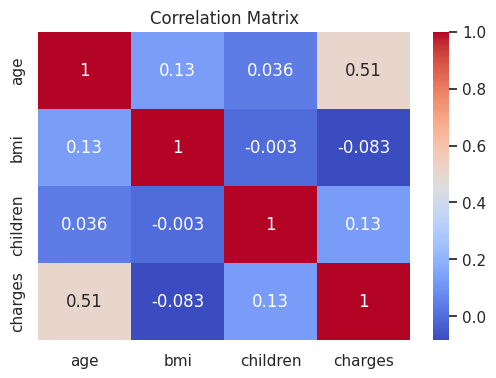

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

I'm splitting the cleaned dataset into features (X) and target (y), then dividing it into training and testing sets. After that, I'm setting up preprocessing: scaling numerical features and one-hot encoding categorical ones using a ColumnTransformer.

In [19]:
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

I'm building a pipeline that first preprocesses the data (scaling and encoding), then applies a linear regression model. After training it on the training set, I'm using it to make predictions on the test set.


In [20]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

I'm evaluating the model's performance using R² (how well the model explains variance) and RMSE (average prediction error). These metrics help me understand how accurate the model is on the test data.

In [21]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.6473
RMSE: 3561.86


I'm training the same linear regression model on the original (uncleaned) dataset to compare its performance. This helps me understand the impact of cleaning by checking how R² and RMSE differ before and after preprocessing

In [22]:
df_raw = pd.read_csv('/content/drive/MyDrive/ACM-TASKS/insurance.csv')

X_raw = df_raw.drop('charges', axis=1)
y_raw = df_raw['charges']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

preprocessor_raw = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

model_raw = Pipeline([
    ('preprocessing', preprocessor_raw),
    ('regression', LinearRegression())
])

model_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = model_raw.predict(X_test_raw)

r2_raw = r2_score(y_test_raw, y_pred_raw)
rmse_raw = np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))

print(f"[Before Cleaning] R² Score: {r2_raw:.4f}")
print(f"[Before Cleaning] RMSE: {rmse_raw:.2f}")

[Before Cleaning] R² Score: 0.7836
[Before Cleaning] RMSE: 5796.28


Summary:     
Loaded the dataset and checked for issues (nulls, duplicates).

Removed duplicates and outliers using the IQR method.

Visualized feature correlations to guide feature selection.

Preprocessed data: scaled numerical and encoded categorical features.

Trained a Linear Regression model using a pipeline.

Evaluated performance with R² and RMSE (after cleaning).

Compared it with the model trained on the raw (uncleaned) dataset.

Observed improved accuracy after cleaning the data.